In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose  
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=10,6

C:\Users\Ramana Reddy (Rakhi)\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df=pd.read_excel(r"C:\Users\Ramana Reddy (Rakhi)\OneDrive\Desktop\crypto project\zcash.xlsx")
df

,ticker,date,open,high,low,close
0,ZEC,2017-01-01,48.0000,49.0100,47.3800,49.0000
1,ZEC,2017-01-02,49.0000,53.0100,47.4100,50.0800
2,ZEC,2017-01-03,50.0800,55.3000,47.5000,50.0000
3,ZEC,2017-01-04,50.0000,54.7000,49.1100,53.1400
4,ZEC,2017-01-05,53.1400,58.0100,44.0100,49.9900
...,...,...,...,...,...,...
2733,ZEC,2024-06-26,20.2054,20.4478,19.4942,19.9264
2734,ZEC,2024-06-27,19.9146,20.9209,19.7458,20.8776
2735,ZEC,2024-06-28,20.8820,21.1982,20.6169,20.9981
2736,ZEC,2024-06-29,20.9682,20.9682,20.2669,20.3254


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2738 entries, 0 to 2737
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ticker  2738 non-null   object        
 1   date    2738 non-null   datetime64[ns]
 2   open    2738 non-null   float64       
 3   high    2738 non-null   float64       
 4   low     2738 non-null   float64       
 5   close   2738 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 128.5+ KB


In [4]:
df.describe()

,open,high,low,close
count,2738.000000,2738.000000,2738.000000,2738.000000
mean,108.815272,114.411646,102.869261,108.804118
std,103.227134,110.103490,95.336739,103.233527
min,19.603700,19.907200,17.977100,19.623900
25%,39.705000,41.361725,38.222500,39.641550
50%,65.025000,67.815000,62.143100,65.045000
75%,145.147500,151.285000,137.980000,145.047250
max,757.170000,799.470000,690.160000,757.170000


In [5]:
df.set_index('date',inplace=True)
indexedDataset=df.drop(columns=['ticker','open','high','low'])
indexedDataset=indexedDataset.resample('M').mean()
indexedDataset


,close
date,
2017-01-31,43.772258
2017-02-28,33.363214
2017-03-31,51.055806
2017-04-30,68.686333
2017-05-31,134.084194
...,...
2024-02-29,23.750059
2024-03-31,31.097958
2024-04-30,24.309683


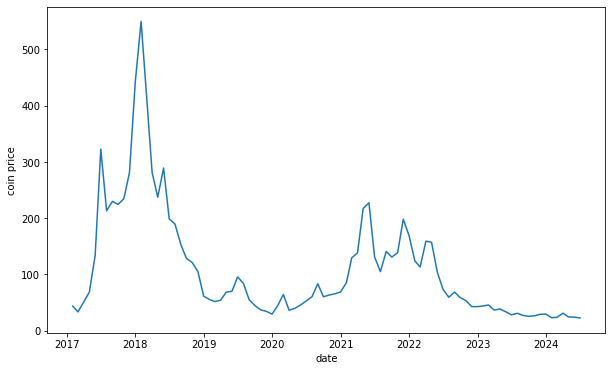

In [6]:
plt.xlabel('date')
plt.ylabel('coin price')
plt.plot(indexedDataset)

In [21]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #determing rolling statistics
    moving_avg=timeseries.rolling(window=12).mean()
    moving_std = timeseries.rolling(window=12).std()
    
    #plot rolling statistics
    orig=plt.plot(timeseries,color='blue',label='Original')
    mean=plt.plot(moving_avg,color='red',label='rolling mean' )
    std=plt.plot(moving_std,color='black',label='rolling std')
    plt.legend(loc='best')
    plt.show(block=False)
    #perform Dickey fuller test;
    print("results of Dickey-fuller test:")
    dftest=adfuller(timeseries['close'],autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],index=['Test statistic','p-value','lags used','number of Observations used'])
    for key,value in dftest[4].items():
        dfoutput['Critical value (%s)'%key]=value
    print(dfoutput)

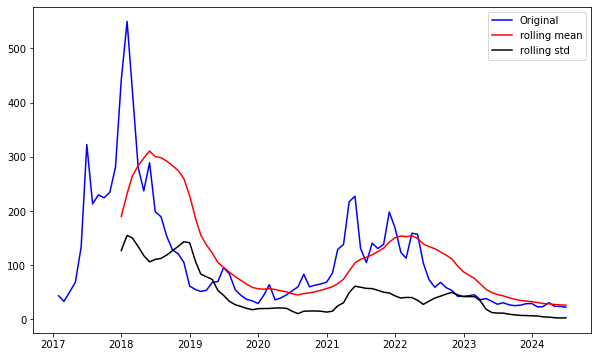

results of Dickey-fuller test:
Test statistic                 -5.148291
p-value                         0.000011
lags used                      12.000000
number of Observations used    77.000000
Critical value (1%)            -3.518281
Critical value (5%)            -2.899878
Critical value (10%)           -2.587223
dtype: float64


In [22]:
test_stationarity(indexedDataset)

# the p-value is p<0.05, then we can say that our data is stationary

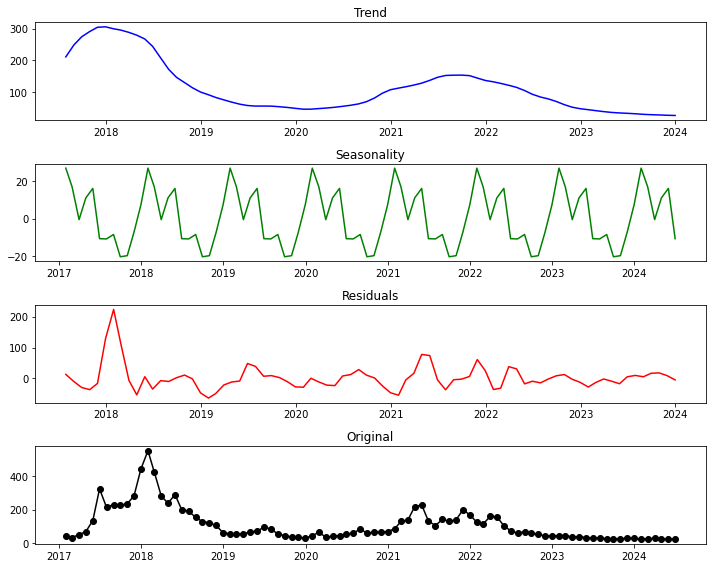

In [9]:
decomposition = seasonal_decompose(indexedDataset, model='additive')
plt.figure(figsize=(10,8))

plt.subplot(4, 1, 1)
plt.plot(decomposition.trend, label='Trend', color='blue')
plt.title('Trend')

plt.subplot(4, 1, 2)
plt.plot(decomposition.seasonal, label='Seasonality', color='green')
plt.title('Seasonality')

plt.subplot(4, 1, 3)
plt.plot(decomposition.resid, label='Residuals', color='red')
plt.title('Residuals')

plt.subplot(4, 1, 4)
plt.plot(indexedDataset.index, indexedDataset.values, marker='o', linestyle='-', label='Original', color='black')
plt.title('Original')

plt.tight_layout()
plt.show()

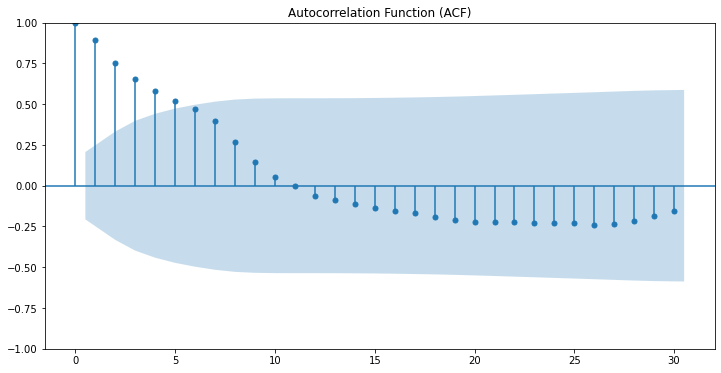

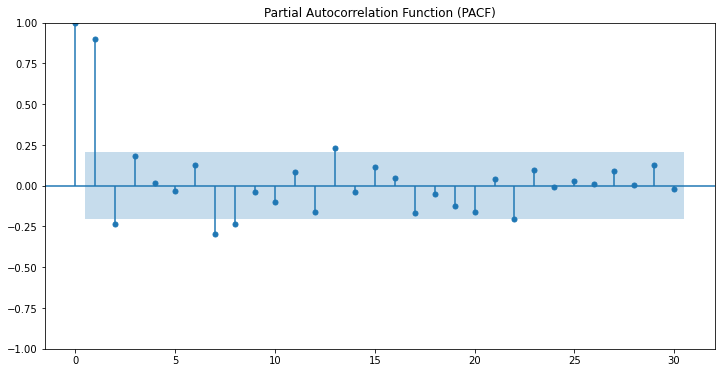

In [10]:
import statsmodels.api as sm

# Plot ACF
fig, ax1 = plt.subplots(figsize=(12, 6))
sm.graphics.tsa.plot_acf(indexedDataset['close'], lags=30, ax=ax1)
plt.title('Autocorrelation Function (ACF)')

# Plot PACF
fig, ax2 = plt.subplots(figsize=(12, 6))
sm.graphics.tsa.plot_pacf(indexedDataset['close'], lags=30, ax=ax2)
plt.title('Partial Autocorrelation Function (PACF)')

plt.show()

In [11]:
# Split data into train and test sets
X = np.arange(len(indexedDataset)).reshape(-1, 1)
y = indexedDataset.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [12]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(72, 1)
(72, 1)
(18, 1)
(18, 1)


C:\Users\Ramana Reddy (Rakhi)\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   72
Model:                 ARIMA(5, 0, 5)   Log Likelihood                -373.807
Date:                Tue, 27 Aug 2024   AIC                            771.614
Time:                        22:11:27   BIC                            798.934
Sample:                             0   HQIC                           782.491
                                 - 72                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        128.2402     45.386      2.826      0.005      39.286     217.195
ar.L1          0.3853      0.139      2.773      0.006       0.113       0.658
ar.L2          1.5810      0.073     21.780      0.000       1.439       1.723
ar.L3         -0.6488      0.252     -2.578      0.010      -1.142      -0.155
ar.L4         -0.9045      0.069    -13.101      0.000      -1.040      -0.769
ar.L5          0.3998      0.148      2.708      0.007       0.110       0.689
ma.L1          0.9117    256.172      0.004      0.997    -501.176     502.999
ma.L2         -1.3420     62.653     -0.021      0.983    -124.140     121.456
ma.L3         -1.2982    303.482     -0.004      0.997    -596.112     593.516
ma.L4          0.9315     84.364      0.011      0.991    -164.419     166.282
ma.L5          0.9759    221.398      0.004      0.996    -432.956     434.907
sigma2      1698.9183   3.85e+05      0.004      0.996   -7.53e+05    7.57e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):                24.45
Prob(Q):                              0.71   Prob(JB):                         0.00
Heteroskedasticity (H):               0.27   Skew:                             1.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.56e+14. Standard errors may be unstable.
"""

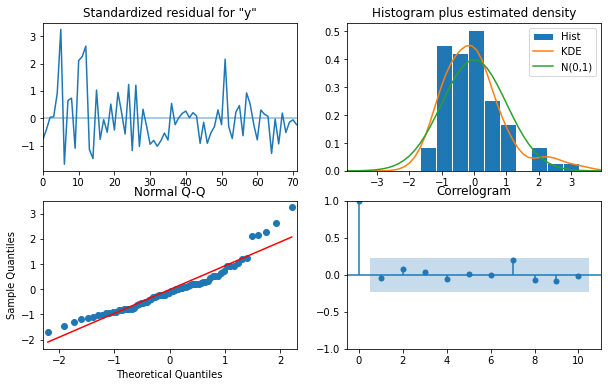

In [20]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(y_train,order=(5,0,5))
results_ARIMA=model.fit()
predicion=results_ARIMA.plot_diagnostics()
results_ARIMA.summary()
 

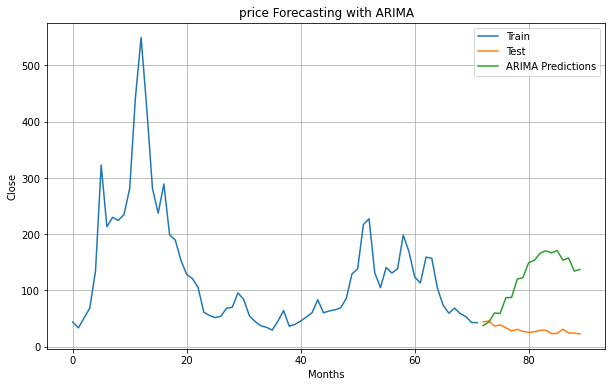

In [14]:
arima_predictions =results_ARIMA.forecast(steps=len(X_test))
# Plot predictions
plt.figure(figsize=(10, 6))
plt.plot(X_train, y_train, label='Train')
plt.plot(X_test, y_test, label='Test')
plt.plot(X_test, arima_predictions, label='ARIMA Predictions')
plt.title('price Forecasting with ARIMA')
plt.xlabel('Months')
plt.ylabel('Close')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
index_future_date=pd.date_range(start='2024-06-30',end='2024-09-25')
print(index_future_date)
pred=results_ARIMA.predict(start=len(indexedDataset),end=len(indexedDataset)+50,typ='levels')
#print(comp_pred)
predindex=index_future_date
dataframe=pd.DataFrame(pred)
dataframe.head(10)

DatetimeIndex(['2024-06-30', '2024-07-01', '2024-07-02', '2024-07-03',
               '2024-07-04', '2024-07-05', '2024-07-06', '2024-07-07',
               '2024-07-08', '2024-07-09', '2024-07-10', '2024-07-11',
               '2024-07-12', '2024-07-13', '2024-07-14', '2024-07-15',
               '2024-07-16', '2024-07-17', '2024-07-18', '2024-07-19',
               '2024-07-20', '2024-07-21', '2024-07-22', '2024-07-23',
               '2024-07-24', '2024-07-25', '2024-07-26', '2024-07-27',
               '2024-07-28', '2024-07-29', '2024-07-30', '2024-07-31',
               '2024-08-01', '2024-08-02', '2024-08-03', '2024-08-04',
               '2024-08-05', '2024-08-06', '2024-08-07', '2024-08-08',
               '2024-08-09', '2024-08-10', '2024-08-11', '2024-08-12',
               '2024-08-13', '2024-08-14', '2024-08-15', '2024-08-16',
               '2024-08-17', '2024-08-18', '2024-08-19', '2024-08-20',
               '2024-08-21', '2024-08-22', '2024-08-23', '2024-08-24',
      

,0
0,116.424379
1,117.519899
2,105.703993
3,104.549594
4,104.756194
5,101.331052
6,112.212798
7,107.176982
8,124.014433
9,118.661384


<AxesSubplot:>

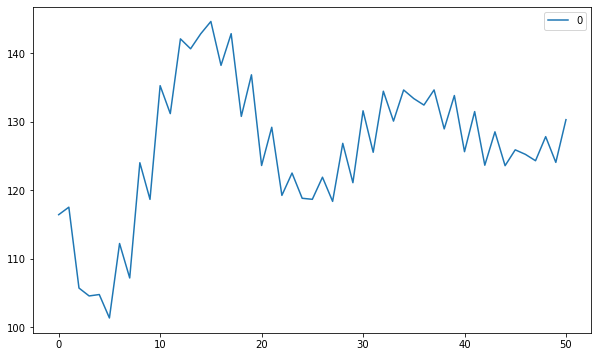

In [17]:
dataframe.plot()

In [32]:
print(r2_score(y_test,arima_predictions))
RMSE = np.sqrt(np.mean( y_test - arima_predictions )**2).round(2)
RMSE

-235.37377010733334


90.79